In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

In [2]:
import splitfolders # or import splitfolders
input_folder = "EyeNet-master"
output = "output" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 320 files [00:00, 2816.42 files/s]


In [3]:
train_path = "output/train"
validation_path = "output/val"
test_path = "output/test"


In [6]:
# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=2,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=2,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=2,
                                            class_mode='categorical')

Found 256 images belonging to 32 classes.
Found 96 images belonging to 32 classes.
Found 32 images belonging to 32 classes.


In [11]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'AMN Macular Neuroretinopathy', 1: "Adult Coats' Disease", 2: 'Adult Foveomacular Dystrophy Pattern', 3: 'Age-Related Macular Degeneration With Pattern Dystrophy Appearance', 4: 'Antiphospholipid Antibody Syndrome', 5: "Behcet's", 6: 'Bilateral Macular Dystrophy', 7: "Bull's Eye Maculopathy Chloroquine", 8: 'CMV Chorioretinitis', 9: 'Central Serous Chorioretinopathy', 10: 'Choroidal Nevus', 11: 'Cone - Rod Dystrophy', 12: 'Congenital Syphillis', 13: 'Diabetic Maculopathy Multiple Myeloma with Retinal Detachment', 14: 'Giant Retinal Tear', 15: 'Juxtafoveal Telangiectasis DM Diabetes', 16: "Leber's Stellate Maculopathy", 17: 'Macular Dystrophy', 18: 'Multifocal Exudative Detachments Due to VKH', 19: 'Myelinated Nerve Fibers', 20: 'North Carolina Dystrophy', 21: 'Optic Disc Drusen', 22: 'Pattern Dystrophy Simulating Fundus Flavimaculatus', 23: 'Reticular Pattern Dystrophy', 24: 'Retinal Folds Following Retinal Reattachment Surgery', 25: 'Retrohyaloid Hemorrhage', 26: 'Roth Spot', 27: 

Feature Extraction for ML

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

# Read input images and assign labels based on folder names
print(os.listdir("output/"))

SIZE = 128  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

['test', 'train', 'val']


In [38]:
for directory_path in glob.glob("output/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Adult Coats' Disease
output/train\Adult Coats' Disease\2.jpg
output/train\Adult Coats' Disease\3.jpg
output/train\Adult Coats' Disease\4.jpg
output/train\Adult Coats' Disease\5.jpg
output/train\Adult Coats' Disease\6.jpg
output/train\Adult Coats' Disease\7.jpg
output/train\Adult Coats' Disease\8.jpg
output/train\Adult Coats' Disease\9.jpg
Adult Foveomacular Dystrophy Pattern
output/train\Adult Foveomacular Dystrophy Pattern\2.jpg
output/train\Adult Foveomacular Dystrophy Pattern\3.jpg
output/train\Adult Foveomacular Dystrophy Pattern\4.jpg
output/train\Adult Foveomacular Dystrophy Pattern\5.jpg
output/train\Adult Foveomacular Dystrophy Pattern\6.jpg
output/train\Adult Foveomacular Dystrophy Pattern\7.jpg
output/train\Adult Foveomacular Dystrophy Pattern\8.jpg
output/train\Adult Foveomacular Dystrophy Pattern\9.jpg
Age-Related Macular Degeneration With Pattern Dystrophy Appearance
output/train\Age-Related Macular Degeneration With Pattern Dystrophy Appearance\2.jpg
output/train\Age-Rela

output/train\Reticular Pattern Dystrophy\8.jpg
output/train\Reticular Pattern Dystrophy\9.jpg
Retinal Folds Following Retinal Reattachment Surgery
output/train\Retinal Folds Following Retinal Reattachment Surgery\2.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\3.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\4.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\5.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\6.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\7.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\8.jpg
output/train\Retinal Folds Following Retinal Reattachment Surgery\9.jpg
Retrohyaloid Hemorrhage
output/train\Retrohyaloid Hemorrhage\2.jpg
output/train\Retrohyaloid Hemorrhage\3.jpg
output/train\Retrohyaloid Hemorrhage\4.jpg
output/train\Retrohyaloid Hemorrhage\5.jpg
output/train\Retrohyaloid Hemorrhage\6.jpg
output/train\Retrohyaloid Hemorrhage\7

In [39]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [52]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("output/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [53]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [54]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [55]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [56]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [64]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))


# CNN

In [8]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='softmax'))

# print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11214976  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
hist = model.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator,  
                 callbacks=early_stopping)

Epoch 1/20
128/128 [==============================] - 5s 33ms/step - loss: 0.2314 - accuracy: 0.9483 - f1_m: 0.9307 - precision_m: 0.9496 - recall_m: 0.9212 - val_loss: 0.0885 - val_accuracy: 0.9727 - val_f1_m: 0.9687 - val_precision_m: 0.9766 - val_recall_m: 0.9648
Epoch 2/20
128/128 [==============================] - 4s 31ms/step - loss: 0.2695 - accuracy: 0.9276 - f1_m: 0.9304 - precision_m: 0.9427 - recall_m: 0.9243 - val_loss: 0.4556 - val_accuracy: 0.8906 - val_f1_m: 0.8945 - val_precision_m: 0.9102 - val_recall_m: 0.8867
Epoch 3/20
128/128 [==============================] - 4s 32ms/step - loss: 0.4716 - accuracy: 0.8621 - f1_m: 0.8599 - precision_m: 0.9015 - recall_m: 0.8391 - val_loss: 0.1083 - val_accuracy: 0.9688 - val_f1_m: 0.9583 - val_precision_m: 0.9766 - val_recall_m: 0.9492
Epoch 4/20
128/128 [==============================] - 4s 32ms/step - loss: 0.1759 - accuracy: 0.9244 - f1_m: 0.9254 - precision_m: 0.9596 - recall_m: 0.9083 - val_loss: 0.0637 - val_accuracy: 0.9805 

In [16]:
model.save('cnn.h5')

In [14]:
cnn_acc = hist.history["val_accuracy"][16]
cnn_prec = hist.history["val_precision_m"][16]
cnn_rec = hist.history["val_recall_m"][16]
cnn_f1 = hist.history["val_f1_m"][16]

In [65]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

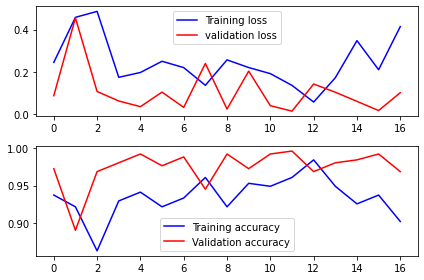

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(hist.history["loss"], color="b", label="Training loss")
ax1.plot(hist.history["val_loss"], color="r", label="validation loss")
ax1.legend()

ax2.plot(hist.history["accuracy"], color="b", label="Training accuracy")
ax2.plot(hist.history["val_accuracy"], color="r", label="Validation accuracy")
ax2.legend()

legend = plt.legend(loc="best")
plt.tight_layout()
plt.show()

Conv Neural Network(UNet Stru) Feature Extraction with SVM

# CNN with SVM

In [57]:

model = Sequential()

# Input Layer
model.add(Conv2D(filters=32, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 32 -> 64
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 64 -> 128
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Middle Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 64 -> 128
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 32 -> 64
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())

#Output Layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 32, 32, 32)        11648     
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 16, 32)        25632     
_________________________________________________________________
batch_normalization_40 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_40 (Activation)   (None, 16, 16, 32)      

In [58]:
#Now, let us use features from convolutional network for RF
feature_extractor= model.predict(x_train)

In [59]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_train_feature = features

In [60]:
X_test_feature = model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_feature, y_train) #For sklearn no one hot encoding

prediction_svm = svm_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_svm = le.inverse_transform(prediction_svm)

svm_acc = accuracy_score(test_labels, prediction_svm)
svm_prec = precision_score(test_labels, prediction_svm,average='weighted')
svm_rec = recall_score(test_labels, prediction_svm,average='weighted')
svm_f1 = f1_score(test_labels, prediction_svm,average='weighted')

In [66]:
storeResults('UNET(CNN)-SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# Comparison

In [68]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                        
                        
                      })

In [69]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,CNN,0.969,0.969,0.961,0.964
1,UNET(CNN)-SVM,0.321,0.290,0.321,0.248


# Graph

In [70]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

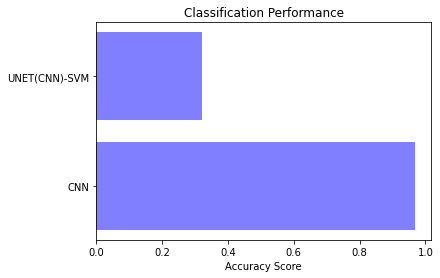

In [71]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

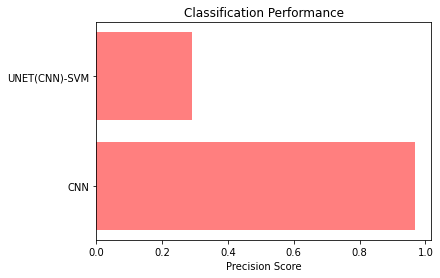

In [72]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

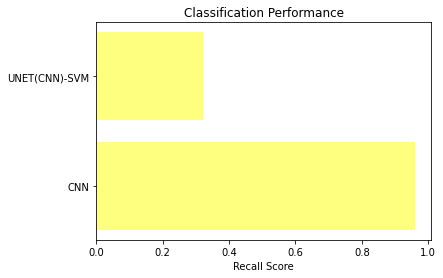

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

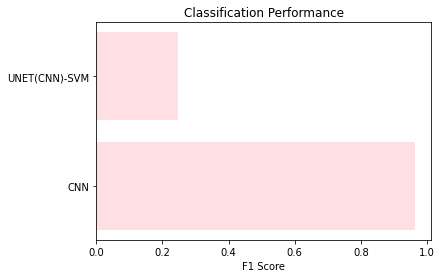

In [74]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()